<a href="https://colab.research.google.com/github/Yaminiakyana/Data-Science-Intern-Assignment-Zeotap/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [7]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# divide the dataset into independent and dependent
x = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, -1]

In [9]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [10]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [11]:
# feature engineering
geography = pd.get_dummies(x['Geography'], drop_first=True, dtype= int)
gender = pd.get_dummies(x['Gender'], drop_first=True, dtype= int)

In [12]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [13]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [14]:
#concatinate thses with dataframe
x = x.drop(['Geography', 'Gender'], axis=1)

In [15]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [16]:
x = pd.concat([x, geography, gender], axis=1)

In [17]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [18]:
## splitting the data into train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [19]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [21]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [22]:
x_train.shape

(8000, 11)

In [23]:
## Part 2 Now lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU,ReLU
from tensorflow.keras.layers import Dropout

In [24]:
## Lets intialize the ANN
classifier = Sequential()

In [44]:
## Adding the input layer
classifier.add(Dense(units = 11, activation='relu'))
classifier.add(Dropout(0.2))

In [45]:
# Adding the first hidden layer
classifier.add(Dense(units = 7, activation='relu'))
classifier.add(Dropout(0.3))

In [46]:
# adding the second hidden layer
classifier.add(Dense(units = 6, activation='relu'))

In [47]:
# adding output layer
classifier.add(Dense(1, activation='sigmoid'))

In [48]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [49]:
# early stopping - it stops the running of epoches when the accuracy repeats same at certain epoch.
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [50]:
model_history = classifier.fit(x_train, y_train, validation_split= 0.33, batch_size=10, epochs=100, callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8093 - loss: 0.5973 - val_accuracy: 0.8376 - val_loss: 0.3958
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8408 - loss: 0.3897 - val_accuracy: 0.8546 - val_loss: 0.3709
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8343 - loss: 0.3698 - val_accuracy: 0.8466 - val_loss: 0.3786
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8452 - loss: 0.3697 - val_accuracy: 0.8523 - val_loss: 0.3667
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8488 - loss: 0.3584 - val_accuracy: 0.8504 - val_loss: 0.3697
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8552 - loss: 0.3440 - val_accuracy: 0.8523 - val_loss: 0.3680
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8643 - loss: 0.3315 - val_accuracy: 0.8485 - val_loss: 0.3728
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8461 - loss: 0.3632 - val_accu

In [51]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

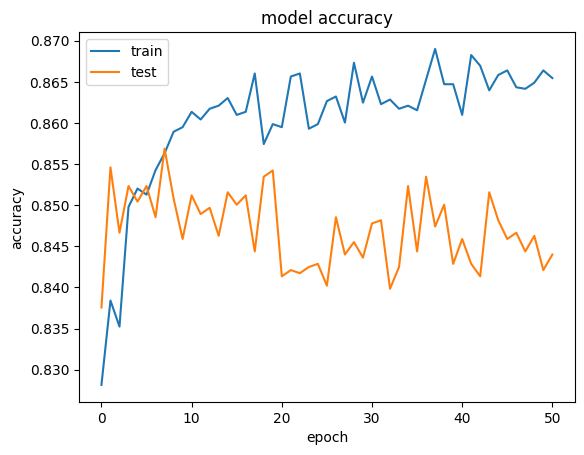

In [52]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

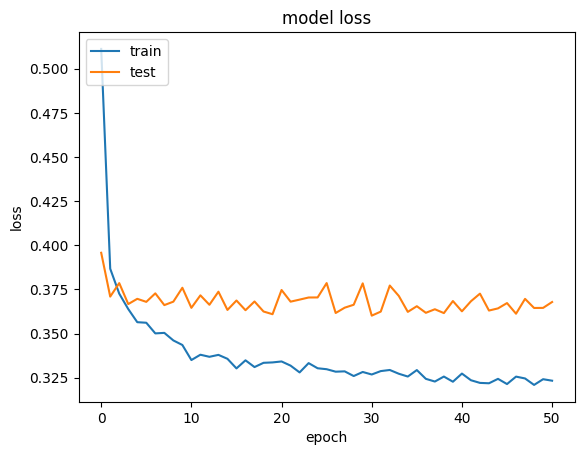

In [53]:
#nsummarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
# part 3 - making the predictions and evaluating the model
# predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [55]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1570,   25],
       [ 271,  134]])

In [56]:
# calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [57]:
score

0.852

In [58]:
# get the weights
classifier.get_weights()

[array([[ 0.3864266 ,  0.09408894,  0.07283078, -0.4655462 ,  0.20465745,
          0.12364586,  0.18868661,  0.22272791,  0.22235732,  0.40052897,
          0.04622008],
        [-0.414247  , -0.12846643,  0.16457947, -0.5405986 ,  0.4009339 ,
         -0.82227755,  0.41382092,  0.2472116 ,  0.39980805, -0.59581405,
         -0.72178143],
        [-0.23397577, -0.03174356,  0.00759807,  0.03724794,  0.30686617,
          0.04359985, -0.36947837, -0.06713475, -0.06082763,  0.5603092 ,
         -0.12396871],
        [-0.00255126, -0.6214788 ,  0.39570954,  0.16369396, -0.85797685,
          0.17278413,  0.19653395,  0.24987426, -0.06899919, -0.7441298 ,
         -0.27896732],
        [ 0.14887512, -1.211235  ,  1.047296  ,  0.39868242, -0.27148563,
         -0.0176677 , -0.43735656, -1.2508992 , -0.27012002,  0.9020027 ,
          0.00168787],
        [ 0.5374788 , -0.07579946, -0.07576011, -0.11507603, -0.00153223,
         -0.12441066, -0.5460517 , -0.04168526,  0.11285657,  0.0187213